# Projeto de Regressão Linear

Libs
pipenv install scikit-learn scipy pandas matplotlib statsmodels fastapi uvicorn pydantic pingouin seaborn ipykernel


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from statsmodels.graphics.gofplots import qqplot


## Carga dos Dados

In [126]:
# Abri o dataset
df_pontuacao = pd.read_csv('./datasets/pontuacao.csv')


In [127]:
#Checar pontuacao
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [128]:
# Visualizar df head
df_pontuacao.head(10)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


In [129]:
df_pontuacao.tail(10)

,horas_estudo,pontuacao_teste
91,44.9,750
92,45.1,755
93,45.3,760
94,45.5,765
95,45.7,770
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


## EDA - Analise Exploratoria de Dados

In [130]:
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

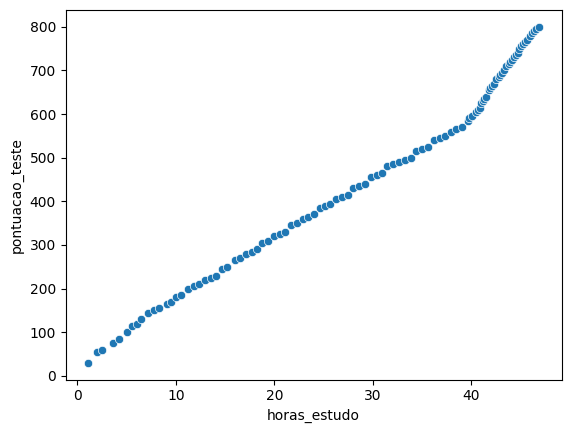

In [131]:
# Plot de Dispersão

# X = horas de estudo
# Y = pontuacao_teste

sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')

. Observamos que há uma relação forte entre as horas de estudo e a pontuação no teste, mas não é uma relação linear perfeita.

<Axes: ylabel='horas_estudo'>

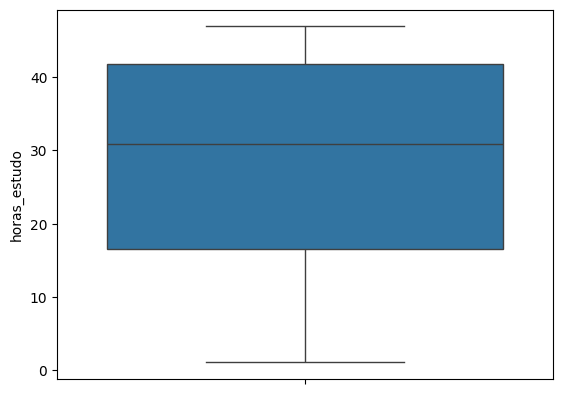

In [132]:
#Verificar se temos outliers
# BoxPlot 
sns.boxplot(df_pontuacao.horas_estudo)

Não a presença de outliers em horas de estudo

<Axes: ylabel='pontuacao_teste'>

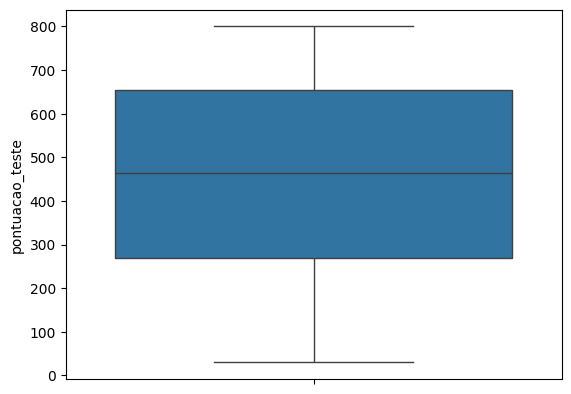

In [133]:
#Verificar se temos outliers
# BoxPlot 
sns.boxplot(df_pontuacao.pontuacao_teste)

In [134]:
#Não a presença de outliers em pontuacao

Verificamos a presença de outliers usando um boxplot e constatamos que não há outliers nas horas de estudo ou na pontuação.

<Axes: >

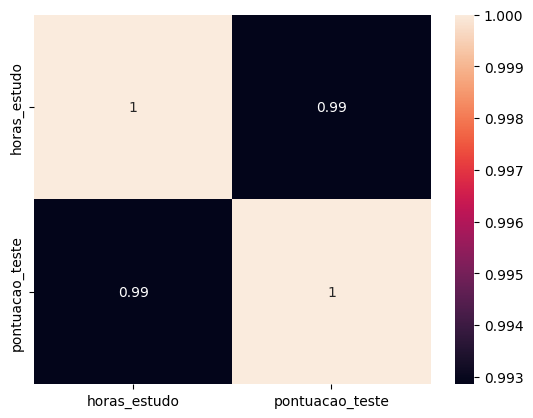

In [135]:
# Verificar Correlçao - Person

sns.heatmap(df_pontuacao.corr('pearson'), annot=True)

<Axes: >

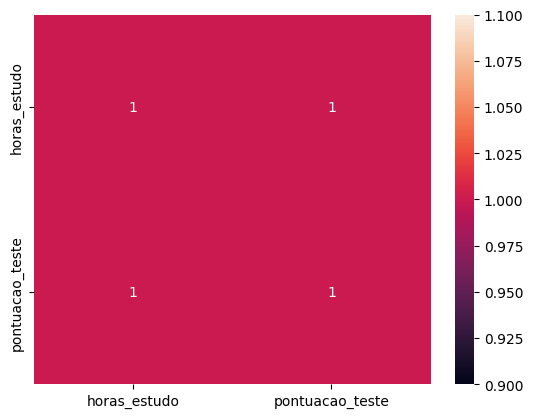

In [136]:
# Verificar Correlçao - spearman

sns.heatmap(df_pontuacao.corr('spearman'), annot=True)

Calculamos a correlação entre as variáveis e constatamos que há uma correlação forte entre elas. 

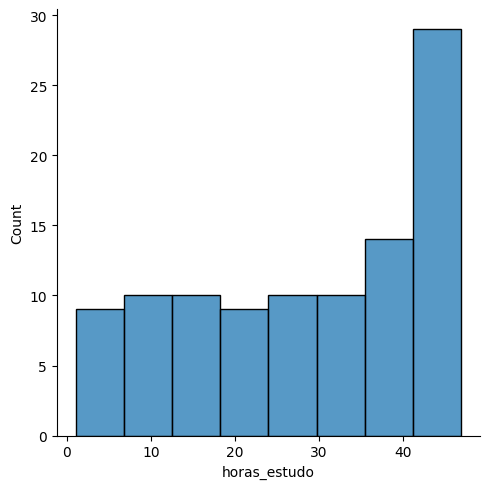

In [137]:
# Histograma das variáveis 
sns.displot(df_pontuacao, x='horas_estudo')

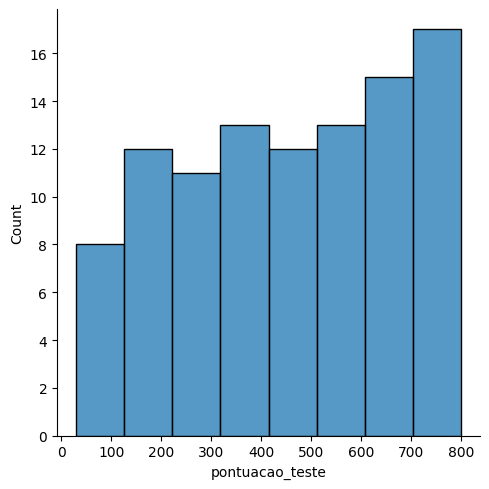

In [138]:
# Histograma das variáveis 
sns.displot(df_pontuacao, x='pontuacao_teste')

## Treinar Modelo de Regressão Linear

A primeira etapa é dividir os dados entre treino e teste. Para isso, criamos duas estruturas para armazenar as variáveis independentes (X) e dependentes (Y). Em seguida, utilizamos a função train_test_split() para dividir o dataset em treino e teste, definindo que 30% dos dados serão usados para teste e 70% para treinamento. Após a divisão, instanciamos o modelo de regressão linear e treinamos o modelo utilizando o conjunto de treinamento. Por fim, imprimimos a equação da reta resultante, que representa a relação entre as variáveis X e Y.

In [139]:
# Dividir dataset entre treino e teste
# Quando temos apenas uma feature, precisamos ajustar o shape
X = df_pontuacao['horas_estudo'].values.reshape(-1, 1)
Y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1)

x_train, x_test, y_train, y_test= train_test_split(X, Y, train_size=0.7, random_state=50)

In [140]:
# Instanciar o Modelo a ser treinador

reg_model = LinearRegression()



In [141]:
#Treinar o Modelo
reg_model.fit(X=x_train, y=y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [142]:
# Imprimir a equação da reta

# y = ax + b
print("A equação da reta é y = {:3f}x + {:3f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))


A equação da reta é y = 15.642619x + 8.476601


## Análise de Métricas - MAE E MSE
Vamos começar a validar o modelo que treinamos anteriormente. Faremos isso através de métricas e análise de resíduos. Primeiro, calcularemos os valores preditos com base no conjunto de testes para verificar se o modelo está fazendo boas previsões em dados não observados durante o treinamento. Usaremos métricas como R-squared, que mede a proporção da variação explicada pela variável independente, e Mean Absolute Error (MAE), que calcula a diferença média entre os valores preditos e os valores reais. O MAE é uma métrica fácil de interpretar e menos sensível a outliers. Vamos calcular essas métricas e interpretar os resultados.

In [159]:
# Predição dos valores com base no conjunto de testes

y_pred = reg_model.predict(x_test)

In [144]:
# Calcular métrica R-squared ou Coeficiente de determinação
# R2 representa a proporção na variação na variável dependente que é explicada pela variável independente
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

r2_score(y_test, y_pred)

0.9828400452912442

In [145]:
# Calcular métrica MAE ( Mean Absolute Error)
# MAE = Media ( y_test - y_pred) 
# É uma metrica facil de interpreta 
# MAE é menos sensível a outliers
mean_absolute_error(y_test, y_pred)

22.957470277134615

In [146]:
# Calcular métrica MSE ( Mean Squared Error )

# MSE = Media (y_test - y_pred)^2
# Não é uma métrica facil de interpreta
# MSE é mais sensivel a outliers e penaliza grandes erros

mean_squared_error(y_test, y_pred)

766.9972992416427

In [147]:
# Calcular métrica RMSE ( Root Mean Squared Error )
# RMSE = Raiz (  Media (y_test - y_pred)^2)
# 0é uma métrica facil de interpreta
root_mean_squared_error(y_test, y_pred)

27.69471608884342

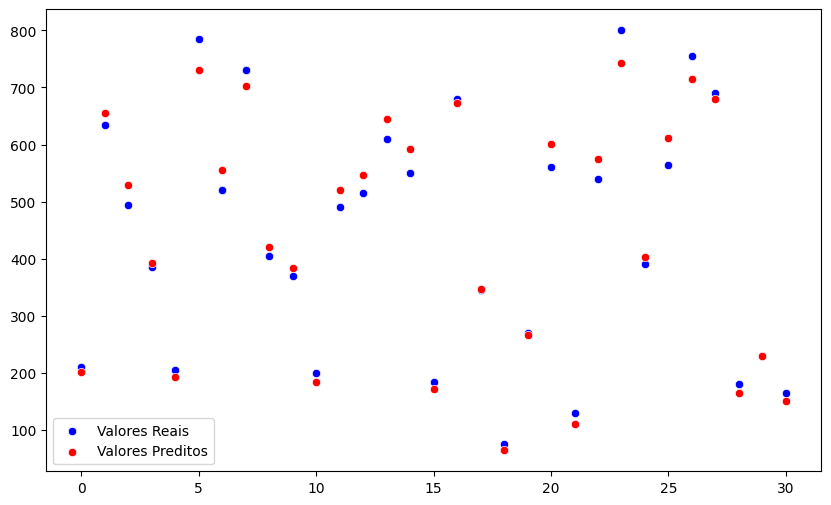

In [148]:
# Analise Gráfica 

x_axis = range(len(y_test))

plt.figure(figsize=(10, 6))

sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color = 'blue', label='Valores Reais')


sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color = 'red', label='Valores Preditos')

plt.legend()

plt.show()

 fizemos uma análise gráfica simples para visualizar os dados preditos e reais do conjunto de teste. Concluímos que é importante observar as diferenças entre os valores preditos e reais, tanto através das métricas quanto visualmente, para avaliar a performance do modelo.

## Análise Gráfica de Resíduos
vamos realizar a análise de resíduos para validar nosso modelo de regressão. Os resíduos são os erros do modelo, ou seja, a diferença entre os valores reais e os valores previstos. Vamos calcular os resíduos e convertê-los para uma escala padronizada. Em seguida, faremos uma análise gráfica dos resíduos para verificar a linearidade e a homogeneidade das variâncias.

In [149]:
# Calcular Residuos 
residuos = y_test - y_pred

In [150]:
# Calcular os resíduos padronizados ( standardization )
# Para cada elemento de um conjunto ( X - media ) / desvio_padrao

from scipy.stats import zscore

residuos_std = zscore(residuos)


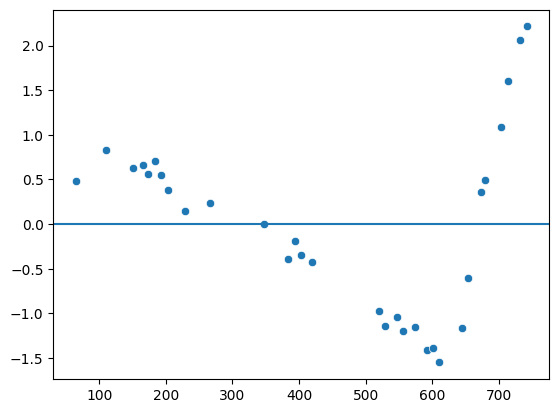

In [151]:
# Verificar linearidade do modelo:
# Se os residuos estiverem entre -2 e +2 ( na escala padrao) - indica linearidade

# Verificar a homogeneidade de variância (Homocedasticidade)

# Valores estiver em torno da reta, temos homocedasticidade, caso contrário
# Se tivermos alguma tendência ou padrão ( formam um cone, funil ), há heterocedasticidade

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)


 Observamos que os resíduos não estão totalmente dentro do intervalo esperado para a linearidade e que há padrões nos dados, indicando que o modelo pode não ser adequado. Além disso, faremos testes estatísticos de normalidade nos resíduos.

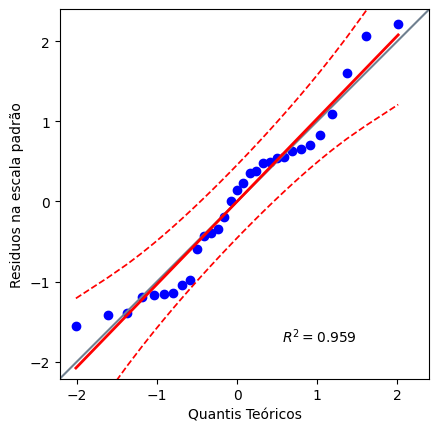

In [152]:
# Checar se resideuos seguem uma distribuição normal
# QQ (Quantile-Quantile) Plt, que avalia de uma amostra se segue uma distribuição normal

import pingouin as pg

pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Residuos na escala padrão')
plt.show()

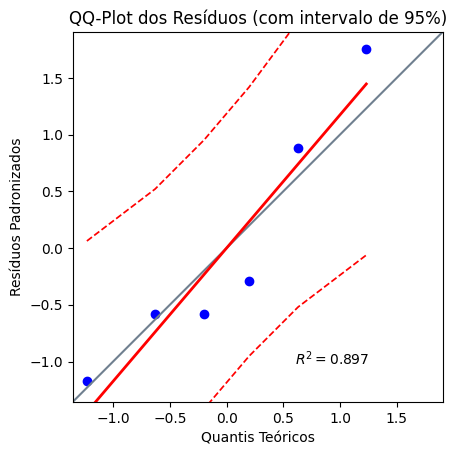

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
from scipy.stats import zscore

# Exemplo de dados (substitua pelos seus)
y_test = np.array([40, 55, 65, 85, 100, 120])
y_pred = np.array([42, 58, 68, 80, 98, 125])

# Resíduos e padronização
residuos_1 = y_test - y_pred
residuos_std_1 = zscore(residuos_1)

# QQ-Plot com Pingouin
pg.qqplot(residuos_std_1, dist='norm', confidence=0.95)

plt.xlabel("Quantis Teóricos")
plt.ylabel("Resíduos Padronizados")
plt.title("QQ-Plot dos Resíduos (com intervalo de 95%)")
plt.show()


In [154]:
# Teste de Normalidade - Shapiro Wilk
# H0 - Segue distribuição norm
# H1 = Não segue uma distribuição normal
# Se o p-valor > 0.05 não rejeita H0, caso contrário rejeitamos.
stat_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))
print("Estatistica do teste: {}, e P-Valor: {}".format(stat_shapiro, p_valor_shapiro))

Estatistica do teste: 0.9500532226161759, e P-Valor: 0.15663817850304973


In [155]:
# Teste de Normalidade - Kolmogorov-Smirnov
# H0 - Segue distribuição norm
# H1 = Não segue uma distribuição normal
# Se o p-valor > 0.05 não rejeita H0, caso contrário rejeitamos.
stat_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print("Estatistica do teste: {}, e P-Valor: {}".format(stat_ks, p_valor_ks))

Estatistica do teste: 0.48355808450512827, e P-Valor: 3.395368995814077e-07


## Predição com o Modelo

In [161]:
# Se eu estudar 30.4 giras, qual a pontuação prevista pelo modelo

reg_model.predict([[30.4]])



array([[484.01220436]])

In [164]:
# Quantas horas estudar para obter 600 pontos (pelo modelos) ?

# y = ax + b -> Equação da Reta

#y - b = ax
# (y - b) / a = x
# x = (y - b) / a

(600 - reg_model.intercept_[0]) / reg_model.coef_[0][0]

np.float64(37.81485802710669)

## Salvar modelo para usar depois



In [165]:
import joblib

joblib.dump(reg_model, './modelo_regressao.pkl')

['./modelo_regressao.pkl']